In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pylab
import scipy.stats as st

In [2]:
sal = pd.read_csv("C:\\Users\\Prajwal\\Desktop\\Data Science\\Assignments\\Simple Linear Regression\\Salary_Data.csv")

In [3]:
sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


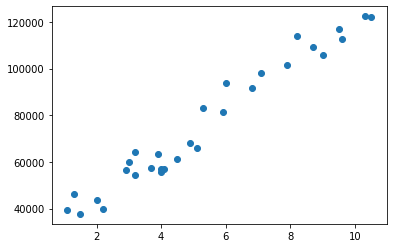

In [4]:
plt.scatter(sal.YearsExperience,sal.Salary)

### Model 1

In [5]:
model1 = LinearRegression()

In [6]:
model1.fit(sal.YearsExperience.values.reshape(-1,1),sal.Salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
pred1 = model1.predict(sal.YearsExperience.values.reshape(-1,1))

In [8]:
pred1

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [9]:
model1.score(sal.YearsExperience.values.reshape(-1,1),sal.Salary)

0.9569566641435084

In [10]:
rmse1 = np.sqrt(np.mean((pred1-sal.Salary)**2))

In [11]:
rmse1

5592.043608760662

In [12]:
model1.coef_

array([9449.96232146])

In [13]:
model1.intercept_

25792.20019866871

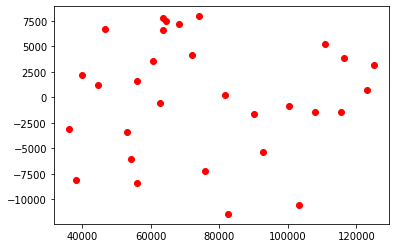

In [15]:
#### Residuals Vs Fitted values
plt.scatter(pred1,(pred1-sal.Salary),c="r")

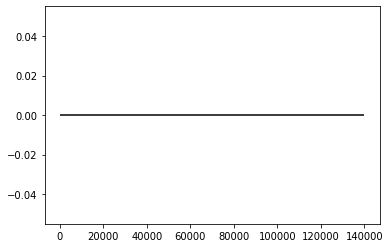

In [16]:
plt.hlines(y=0,xmin=0,xmax=140000) 

(array([2., 2., 2., 1., 2., 6., 3., 4., 2., 6.]),
 array([-11448.0258726 ,  -9507.42248153,  -7566.81909046,  -5626.21569939,
         -3685.61230832,  -1745.00891726,    195.59447381,   2136.19786488,
          4076.80125595,   6017.40464702,   7958.00803809]),
 <a list of 10 Patch objects>)

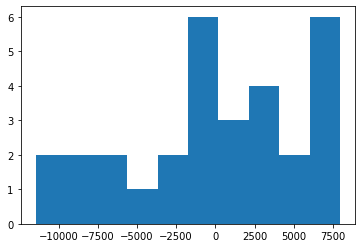

In [17]:
# checking normal distribution for residual
plt.hist(pred1-sal.Salary)

In [18]:
### Fitting Quadratic Regression 
sal["YearsExperience_sqrd"] = sal.YearsExperience*sal.YearsExperience

### Model 2

In [19]:
model2 = LinearRegression()

In [20]:
model2.fit(X = sal.iloc[:,[0,2]],y=sal.Salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
pred2 = model2.predict(sal.iloc[:,[0,2]])

In [22]:
pred2

array([ 36419.97995933,  38279.7051688 ,  40140.74178358,  44799.07071874,
        46664.69725209,  53204.7174356 ,  54140.31743855,  56012.50099842,
        56012.50099842,  60698.69729633,  62575.47077478,  63514.34929099,
        63514.34929099,  64453.55565853,  68213.65964195,  71979.00924659,
        73863.65115687,  75749.60447246,  81415.33285105,  82360.76839379,
        89936.05538347,  92782.19755149, 100386.33545789, 103243.29671968,
       108011.45584918, 110876.2855428 , 115657.55872536, 116614.79691585,
       123324.64408643, 125244.69393997])

In [23]:
# Adjusted R-Squared value
model2.score(sal.iloc[:,[0,2]],sal.Salary)

0.956975168321065

In [24]:
rmse2 = np.sqrt(np.mean((pred2-sal.Salary)**2))

In [25]:
rmse2

5590.841479683287

In [26]:
model2.coef_

array([9259.2838882 ,   16.39256632])

In [27]:
model2.intercept_

26214.932677059587

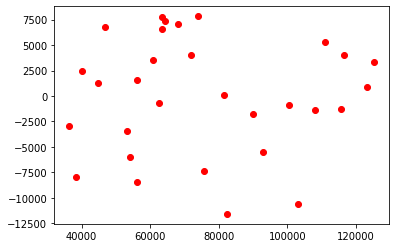

In [28]:
#### Residuals Vs Fitted values
plt.scatter(pred2,(pred2-sal.Salary),c="r")

(array([2., 2., 2., 1., 2., 6., 3., 3., 3., 6.]),
 array([-11579.23160621,  -9637.8433299 ,  -7696.45505359,  -5755.06677728,
         -3813.67850097,  -1872.29022467,     69.09805164,   2010.48632795,
          3951.87460426,   5893.26288057,   7834.65115687]),
 <a list of 10 Patch objects>)

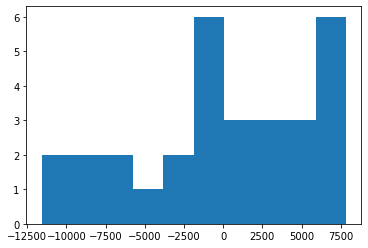

In [29]:
# Checking normal distribution
plt.hist(pred2-sal.Salary)

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-11579.23160621, -10568.70328032,  -8432.49900158,  -7925.2948312 ,
          -7338.39552754,  -6009.68256145,  -5490.80244851,  -3437.2825644 ,
          -2923.02004067,  -1801.94461653,  -1419.54415082,  -1311.44127464,
           -915.66454211,   -642.52922522,     52.33285105,    933.64408643,
           1274.07071874,   1567.50099842,   2409.74178358,   3372.69393997,
           3509.69729633,   3979.79691585,   4041.00924659,   5294.2855428 ,
           6557.34929099,   6773.69725209,   7102.65964195,   7372.55565853,
           7720

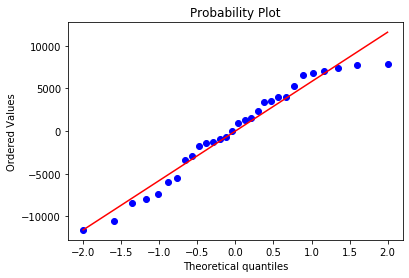

In [30]:
st.probplot(pred2-sal.Salary,dist="norm",plot=pylab)

In [32]:
sal["Salary_sqrt"] = np.sqrt(sal.Salary)

### Model 3

In [33]:
model3 = LinearRegression()

In [34]:
model3.fit(X = sal.iloc[:,[0,2]],y=sal.Salary_sqrt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
pred3 = model3.predict(sal.iloc[:,[0,2]])

In [36]:
pred3

array([193.46389705, 197.65502254, 201.81236039, 212.05788414,
       216.09696528, 229.96767168, 231.91541353, 235.78555651,
       235.78555651, 245.31309307, 249.06497934, 250.92825211,
       250.92825211, 252.78307798, 260.11791235, 267.3175962 ,
       270.86675667, 274.38212951, 284.72552224, 286.41985686,
       299.67044505, 304.50004164, 317.00730192, 321.55815055,
       328.97396009, 333.32208292, 340.40001614, 341.79026206,
       351.28547007, 353.92236448])

In [37]:
model3.score(sal.iloc[:,[0,2]],sal.Salary_sqrt)

0.953577718671803

In [38]:
rmse3 = np.sqrt(np.mean(((pred3)**2-sal.Salary)**2))

In [39]:
rmse3

5505.447608295218

In [40]:
model3.coef_

array([21.96925641, -0.4223454 ])

In [41]:
model3.intercept_

169.8087529382861

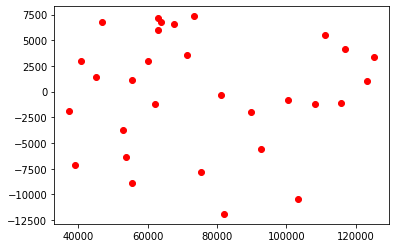

In [42]:
#### Residuals Vs Fitted values
plt.scatter((pred3)**2,((pred3)**2-sal.Salary),c="r")

(array([2., 1., 3., 1., 1., 6., 4., 3., 2., 7.]),
 array([-11903.66559887,  -9979.31905209,  -8054.9725053 ,  -6130.62595852,
         -4206.27941173,  -2281.93286494,   -357.58631816,   1566.76022863,
          3491.10677541,   5415.4533222 ,   7339.79986898]),
 <a list of 10 Patch objects>)

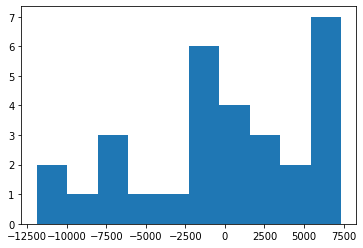

In [43]:
# checking normal distribution for residuals 
plt.hist((pred3)**2-sal.Salary)

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-11903.66559887, -10412.35581775,  -8850.17134139,  -7802.44700432,
          -7137.49206633,  -6365.24096784,  -5552.72464198,  -3756.86998393,
          -1935.62436397,  -1914.72053895,  -1207.13358311,  -1184.63606668,
          -1096.82901194,   -808.37052792,   -294.37698233,   1010.48148507,
           1149.82865861,   1443.54622547,   2989.51363219,   2997.22880675,
           3389.0400768 ,   3520.69723584,   4185.58323899,   5521.61096137,
           6007.98770764,   6550.32832533,   6806.89840384,   6818.28451061,
           7170

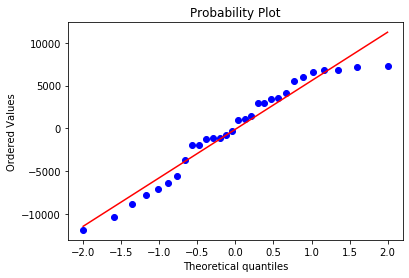

In [44]:
st.probplot((pred3)**2-sal.Salary,dist="norm",plot=pylab)

In [45]:
model4 = LinearRegression()

### Model 4

In [46]:
model4.fit(X = sal.YearsExperience.values.reshape(-1,1),y=sal.Salary_sqrt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
pred4 = model4.predict(sal.YearsExperience.values.reshape(-1,1))

In [48]:
model4.score(sal.YearsExperience.values.reshape(-1,1),sal.Salary_sqrt)

0.9498353533865289

In [49]:
rmse4 = np.sqrt(np.mean(((pred4)**2-sal.Salary)**2))

In [50]:
rmse4

5926.008666359509

In [51]:
model4.coef_

array([17.05653205])

In [52]:
model4.intercept_

180.70022140543102

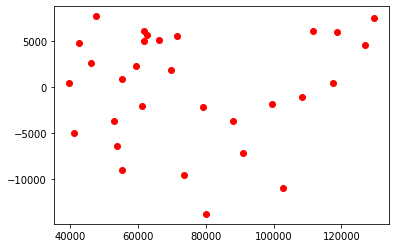

In [53]:
#### Residuals Vs Fitted values
plt.scatter((pred4)**2,((pred4)**2-sal.Salary),c="r")

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-13828.69028846, -11050.86024821,  -9592.87606245,  -9087.7927052 ,
          -7188.79486389,  -6386.38770647,  -5047.25654489,  -3716.2247755 ,
          -3666.45744854,  -2214.31520188,  -2099.92727082,  -1795.3008483 ,
          -1129.42246716,    442.25167088,    499.84027951,    912.2072948 ,
           1904.45347807,   2254.01864794,   2619.74762985,   4617.48739174,
           4822.50926219,   5007.32752837,   5171.87910997,   5628.15169638,
           5735.40083327,   6005.93139855,   6113.66227   ,   6170.32752837,
           7579

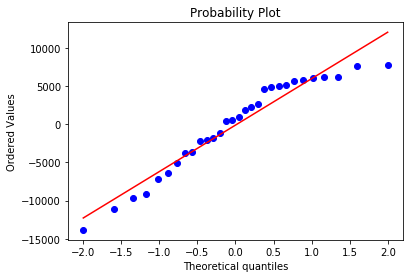

In [54]:
st.probplot((pred4)**2-sal.Salary,dist="norm",plot=pylab)

(array([1., 2., 1., 2., 3., 4., 3., 3., 4., 7.]),
 array([-13828.69028846, -11672.72400793,  -9516.75772739,  -7360.79144686,
         -5204.82516632,  -3048.85888579,   -892.89260525,   1263.07367528,
          3419.03995582,   5575.00623635,   7730.97251689]),
 <a list of 10 Patch objects>)

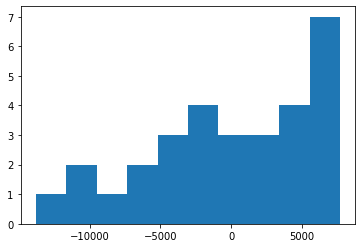

In [55]:
plt.hist((pred4)**2-sal.Salary)

### Model 1&2 are having better R-Squared value compared to other models